We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [5]:
df=pd.read_csv("FuelConsumption.csv")

In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets first have a descriptive exploration on our data.

In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets select some features to explore more.

In [10]:
 cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


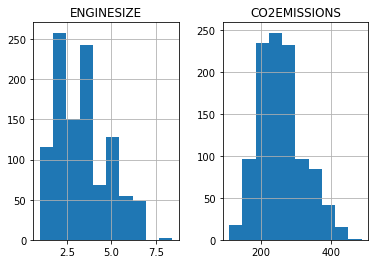

In [13]:
viz=cdf[['ENGINESIZE','CO2EMISSIONS']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:



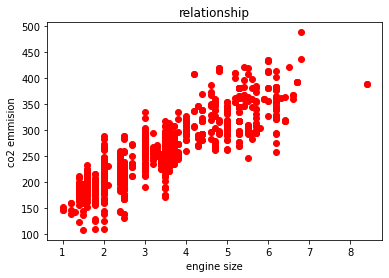

In [15]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="red")
plt.xlabel('engine size')
plt.ylabel('co2 emmision')
plt.title('relationship')
plt.show()

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
x_data=df[['ENGINESIZE']]
x_data.head()

,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5


In [21]:
y_data=df[['CO2EMISSIONS']]
y_data.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

In [26]:
lm=LinearRegression()
lm.fit(x_train,y_train)
yhat=lm.predict(x_test)

In [27]:
print("intercept is :",lm.intercept_)
print("coefficient is :",lm.coef_)

intercept is : [125.55268333]
coefficient is : [[39.64771341]]


Plot outputs
we can plot the fit line over the data:

Text(0, 0.5, 'Emission')

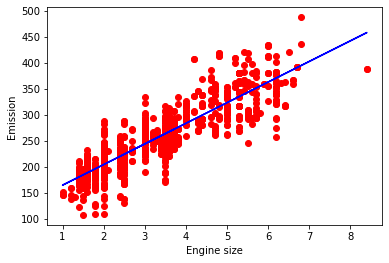

In [30]:
plt.scatter(df["ENGINESIZE"], df["CO2EMISSIONS"],  color='red')
plt.plot(x_train, lm.coef_[0][0]*x_train + lm.intercept_[0],'-b')
plt.xlabel("Engine size")
plt.ylabel("Emission")

EVALUATION

In [32]:
from sklearn.metrics import r2_score

'''test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)'''

print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((yhat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(yhat , y_test) )

Mean absolute error: 25.47
Residual sum of squares (MSE): 1092.29
R2-score: 0.66
